In [257]:
import numpy, matplotlib.pyplot as plt
class bandit:
    def __init__(self, q, stationary = True, vala = -1):
        if(stationary):
            self.a = numpy.random.normal(0.0, 1.0, 1)[0]
        else:
            self.a = vala
#         print(self.a)
        self.q = q
        self.n = 0
        
    def reward(self):
        return numpy.random.normal(self.a, 1.0,1)[0]
    def update_bandit(self, rew):
        self.q = (self.q*self.n + rew)/(self.n+1)
        self.n += 1
        return self.q
    def update_bandit_aplha(self, aplha, rew):
#         print(rew, aplha, self.q)
        self.q = self.q + aplha * (rew - self.q)
        self.n +=1 
        return self.q
    def modify_phi(self):
        self.a += numpy.random.normal(0.0, 0.01, 1)[0]

In [284]:
# from decimal import *


class multi_bandit:
    def __init__(self, n,e, q = [], stationary = True):
        self.n = n
        self.e = e
        self.rewards = [0,]
        self.step = 1
        self.occurances = [0 for i in range(n)]
        
        if(len(q) == 0):
            self.q = [0 for i in range(n)]
        else:
            self.q = q
        if(not stationary):
            x = numpy.random.normal(0.0, 1.0, 1)[0]
            self.bandits = [bandit(self.q[i], stationary, x) for i in range(n)]
        else:
            self.bandits = [bandit(self.q[i]) for i in range(n)]
            
        
    def modify_phi(self):
        for i in range(self.n):
            self.bandits[i].modify_phi()
        

    def simulate_turn(self, aplha = 0, ucb = False):
        inf = int(1e10 + 10)

#         print(self.q)
        x = numpy.random.uniform(0.0, 1.0)
        index = self.n + 10
        if(ucb):
            max1 = [-1, -1]
            lnt = numpy.log(self.step)
            c = ucb
            for i in range(self.n):
                if(self.bandits[i].n == 0):
                    max1 = [inf, i]
                    break
                    if(lnt == 0):
                        print('crap')
                max1 = max([self.q[i] + c*numpy.sqrt(lnt/self.bandits[i].n), i], max1)
            index = max1[1]
        
        
        elif(x > self.e):
            #greedy
            index = numpy.argmax(self.q)
#             print(index)
        else:
            index = numpy.random.randint(0, self.n-1)
#             print(index)

        rew = self.bandits[index].reward()
        optimal = [self.bandits[0].a, 0]
        for i in range(self.n):
            optimal = max(optimal, [self.bandits[i].a, i])   
#         print(optimal)
        self.correct.append(index == optimal[1])
        self.rewards.append(rew)
        if(aplha == 0):
            self.q[index] = self.bandits[index].update_bandit(rew)
        else:
#             print('here')
            self.q[index] = self.bandits[index].update_bandit_aplha(aplha, rew)
    def simulate(self, turns, stationary = True, ucb = False):
        self.correct = []
        self.rewards = [0,]
        self.step = 1
        for i in range(turns):
            self.step = 0
            self.simulate_turn(0, ucb)
            if(not stationary):
                self.modify_phi()
    def simulate_alpha(self, turns, aplha, stationary = True, ucb = False):
#         print('a',self.q)
        self.correct = []
        self.step = 1
        self.rewards = []
#         print(self.optimal)
#         print(alpha, turns)
        for i in range(turns):
            
            self.simulate_turn(aplha, ucb)
            self.step += 1
            if(not stationary):
                self.modify_phi()


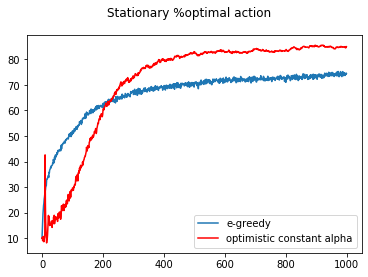

In [298]:
#optimistic Stationary Fig2.3

times = 2000
turns = 1000
alpha = 0.1

standard = [multi_bandit(10, 0.1, [], True) for i in range(times)]  
qs = [5 for i in range(10)]
optimistic = [multi_bandit(10, 0, qs.copy(), True) for i in range(times)]
for i in range(times):
    standard[i].simulate(turns, True)            
    optimistic[i].simulate_alpha(turns, alpha, True)
optimal_action1 = [0 for i in range(turns)]
optimal_action2 = [0 for i in range(turns)]
for i in range(turns):
    for j in range(times):
        optimal_action1[i] += standard[j].correct[i]
        optimal_action2[i] += optimistic[j].correct[i]
    optimal_action1[i]*=100
    optimal_action2[i]*=100
    optimal_action1[i]/=times
    optimal_action2[i]/=times
plt.plot(optimal_action1, label = "e-greedy")
plt.plot(optimal_action2, 'r', label = 'optimistic constant alpha')
plt.legend(loc = 'lower right')
plt.suptitle("Stationary %optimal action")
plt.show()

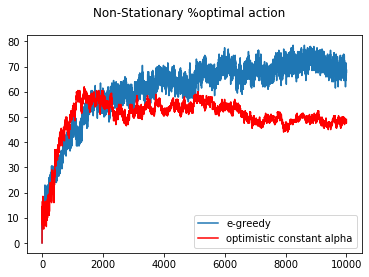

In [299]:
#optimistic Non-Stationary
times = 200
turns = 10000
alpha = 0.1

standard = [multi_bandit(10, 0.1,[], False) for i in range(times)]  
qs = [5 for i in range(10)]
optimistic = [multi_bandit(10, 0, qs.copy(), False) for i in range(times)]
for i in range(times):
    optimistic.append(multi_bandit(10, 0, qs))
for i in range(times):
    standard[i].simulate_alpha(turns, alpha, False)            
    optimistic[i].simulate_alpha(turns, alpha, False)
#     print(i)
optimal_action1 = [0 for i in range(turns)]
optimal_action2 = [0 for i in range(turns)]
for i in range(turns):
    for j in range(times):
        optimal_action1[i] += standard[j].correct[i]
        optimal_action2[i] += optimistic[j].correct[i]
    optimal_action1[i]*=100
    optimal_action2[i]*=100
    optimal_action1[i]/=times
    optimal_action2[i]/=times
plt.plot(optimal_action1, label = "e-greedy")
plt.plot(optimal_action2, 'r', label = 'optimistic constant alpha')
plt.suptitle("Non-Stationary %optimal action")
plt.legend(loc = 'lower right')
plt.show()

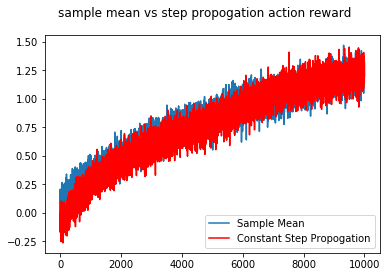

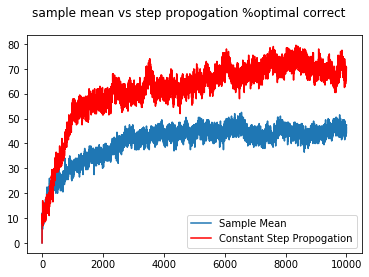

In [297]:
#Non-Stationary Exr 2.5
times = 200
turns = 10000
alpha = 0.1

standard = [multi_bandit(10, 0.1,[], False) for i in range(times)]  
step_propogation = [multi_bandit(10, 0.1,[], False) for i in range(times)]

for i in range(times):
    standard[i].simulate(turns, False)            
    step_propogation[i].simulate_alpha(turns, alpha, False)
optimal_action1 = [0 for i in range(turns)]
optimal_action2 = [0 for i in range(turns)]
action_reward1 = [0 for i in range(turns)]
action_reward2 = [0 for i in range(turns)]
for i in range(turns):
    for j in range(times):
        optimal_action1[i] += standard[j].correct[i]
        optimal_action2[i] += step_propogation[j].correct[i]
        action_reward1[i] += standard[j].rewards[i]
        action_reward2[i] += step_propogation[j].rewards[i]
    optimal_action1[i]*=100
    optimal_action2[i]*=100
    optimal_action1[i]/=times
    optimal_action2[i]/=times
    action_reward1[i]/=times
    action_reward2[i]/=times
    
plt.plot(action_reward1, label = "Sample Mean")
plt.plot(action_reward2, 'r', label = "Constant Step Propogation")
plt.suptitle("sample mean vs step propogation action reward ")
plt.legend(loc = 'lower right')
plt.show()
plt.plot(optimal_action1, label = "Sample Mean")
pldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYMAAAEVCAYAAAACW4lMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydZ3gUVReA35MQepciPdK7SFdEUAEBsSEqKopdQEWxYgURsHdFP1QEG0UsoKJIFZAakN4MECDSOyEEUu73Y2aT2ZZskt0kJOd9nmRnbpszs7P33HqOGGNQFEVRCjZhuS2AoiiKkvuoMlAURVFUGSiKoiiqDBRFURRUGSiKoiioMlAURVFQZZDjiMh4ERmZ23Io+R8R2SAinXNbjvQQkTgRqZ3bcuQkIhIjIl1yWw5PVBkoeRoRiRQRIyKFcluWvIyvRoYxpokxZn4uieSFiMwXkfucYcaYksaY7bklk5KGKgNFCRBVSOcmufW9nXPvizGmwPwBzwD/ASeBLcCVdnhbYAlwDNgLfAQUduQzwCDgXzvvK0AdO88JYIorPdAZiAWeAw4BMcDtjrLGAyMd572A1fa1FwPN05E/YDkyKhsYCmyzy9kI3OCIuwtYBLwFHAV2AD38yDQUmOoR9j7wgaOs7fZ1djifhUeetkCUfR/7gXfs8F32fcfZfxfb4fcAm2z5ZgK1PJ7TYPu6h4A3gTA/1x0OTAUm2zKuAi50xMfY781a4AxQCGgEzLef6wbgWo/v91Ngll3eXx6yXQKsAI7bn5c44i4AFtj5ZgMfA9844r8H9tl5FwBN7PAHgETgrP2MfnHI3sU+LgK8B+yx/94Dini8s08AB7B+A3en8x7ebT/7k/YzftAj/jqs9+4E1jvWHRgFJAMJtowfOb6ruvZxGeAr4CCwE3jB9b2RiXcyne+tKvCDXf4OYLCdtihwGqhgn78AJAGl7fORwHv28dXAP/a97QaGO64Zad/PvVjv7QI7/A77fg4Dzzu/l7z0l+sC5NiNQgP7y6vq+OLq2MetgPb2CxNpv+iPOfIaYDpQGmhiv1xzgNr2C7wR6O/4YSUB79g/wE7AKaCBHT8eWxkALe0fXzsgHOhvvyhF/NxDZuRIt2zgJvvHEQbcYstYxfHDSwTut/MOxKpAxIdMtYB4xw8nHKsyaQ+UsH80rnuvgl2B+ShnCXCHfVwSaO/xAyvkSHs9EI1VKRfC+vEu9nhO84DyQE1gK3Cfn+sOt++1DxABPIlVUUTY8TFYFVsNoJidJhpL2RcGrsCqFJ3f70ngMvv7fx9YZMeVx6rI7rDlvtU+P8/xDN6yy73UfnZOZXAPUIq0in21I248jkaGQ3aXMhgBLAUqARWxGgeveLyzI+z762l/p+X8PLOrsRohgvV+xwMt7bi2WMqqK9a7VQ1oaMfN9/wecFcGXwHT7HuMtL+3ezP7Tvr53sKAlcBL9vOtjaXIrrLTLwButI//xFJiPRxxNzieVTO7vOZYDZfrPd7Vr7De/WJAYyzl53of3rGftSqDXLtRqItVOXbB/qGnk/Yx4CePF7aD43wl8Izj/G3SWg6uH1YJR/wU4EX7eDxpyuAT1w/SkXYL0MmPXJmRI7Nlrwaus4/vAqIdccXta5/vJ+8i4E77uCuwzT4ugdV6vhEolsEzXwC8jN06c4S7fmBOZfA7diVhn4dhVUi1HM+puyN+EDDHz3WHA0s9ytoLdLTPY4B7HPEdsVrnYY6widgtRPv7neSIK4nVIq6BpQSWe1x/if28a9rvTXFH3Dc4lIFHvrL2fZbxfK8caWJIUwbbgJ6OuKuAGMc7e9rjGR/AVsgB/LZ+Bh61j/8HvOsn3Xz8KAOsCv4M0NgR9yAwP4vvpOf31g7Y5ZHmWeBL+/gV4AMsJb0PeBR4DY9eg4/rvOe6X9Le1dqO+Jc83ocSWD24PKcMCsycgTEmGquSHw4cEJFJIlIVQETqi8ivIrJPRE4Ao4EKHkXsdxyf9nFe0nF+1BhzynG+E6sV7kkt4AkROeb6w6o0fKXNrBzpli0id4rIakdcU9zveZ/rwBgTbx8679HJd1itXIDb7HPsZ3ALMADYKyK/iUhDP2XcC9QHNovIChHp5Sed697ed8h+BKuVWs2RZrfj2N/z90prjEnBGjKp6iveDt9tp3OW7/Paxpg4W76q9t9Oj2u78lYFjjietVs5IhIuIq+JyDb7HY2xozzfU394XtvzmRw2xiQ5zuPx832LSA8RWSoiR+zn39MhRw0sxZNZKmC12D1ldD7XzLyT4P691QKqevwengMq2/F/YSnFlsA6rGG+Tlg93GhjzCEAEWknIvNE5KCIHMd6tz2/A6/3xSH3KazhojxHgVEGAMaY74wxl2K9GAZ43Y76BNgM1DPGlMZ6SSQblyonIiUc5zWxurSe7AZGGWPKOv6KG2MmZuPaGZYtIrWAz4CHsYYoygLryfo9fw90FpHqwA3YygDAGDPTGNMVa4hos31dL4wx/xpjbsUaxngdmGo/Q+Pn3h70uLdixpjFjjQ1HMf+nr9XWhEJA6p7pHfKsAeoYadzlv+fn/JKYg0Pucbqa3lc25V3L1BeRIr7uYfbsMbiu2ANCUa6LuFDRl94XjujZ+ITESmCNe7+FlDZfndmOOTYjTWE5Iv0ZDyENQzkKeN/vpMHhPN6u4EdHu9MKWNMTzt+MdZQ8g3AX8aYjfb1r8ZSFC6+wxqqrWGMKYM1P+T5u3Fedy/u70Nx4Lxs3FPIKDDKQEQaiMgV9sucgNWKTrajS2GNz8bZLdeBQbjkyyJSWEQ6Yk3kfu8jzWfAALu1ISJSQkSuFpFSQbh+emW7KtmDACJyN1bPIEsYYw5iDQF8ifWD22SXW1lErrUr9TNYY6fJvsoQkX4iUtFucR+zg5NtGVOwxnhdfAo8KyJN7LxlROQmjyKfEpFyIlIDq8s/OZ1baCUive3VH4/Zsi71k3YZ1vzK0yISYa/jvwaY5EjTU0QuFZHCWMMPy4wxu7EqzfoicpuIFBKRW7DGlH81xuzEmkAfbr83F9vluihly3UYa4hktIdc+z2ekScTgRdEpKKIVMAavvgmnfT+KIw19n0QSBKRHkA3R/wXwN0icqWIhIlINUdv0K+MxphkrOHUUSJSym6wPJ5FGX2xHDghIs+ISDG7p9VURNrY14/HGnZ9iLTKfzHWUJVTGZTC6sEliEhbLCWdHlOBXo73YQR5tN7Nk0KFiCJYY4CHsLqblbB6AGBNGt6GNfH3GelXHIGwD2ticA/wLTDAGLPZM5ExJgprQuwjO3001thotkmvbLvV8zbWePV+rAmxv7N5ye+wWq3fOcLCsFao7MEaKumENX7vi+7ABhGJw5p07WuMSbB/pKOAv+3ufXtjzE9YvYdJ9pDJeqCHR3nTsH7cq4HfsCopf0zDGs5yTe72NsYk+kpojDkLXGtf7xAwBmu+xPn9fgcMs++5FXC7nfcwVsPgCaxK/Wmgl2sIwk53sR03Eus9PGPHfYU1bPIf1kIBT2X1BdDYfkY/+xB9JJayWYs1DLLKDssUxpiTWCu1pmA9r9uwWsqu+OVYq43exZpI/ou01v77QB8ROSoiH/go/hEsRbsdax7qO2BcZmX0I3cylnJtgbVA4BDwOVYvy8VfWBPoyx3npbDms1wMAkaIyEkshTolg+tuwFIw32H1Eo5iDUPmOcSe1FCChN1S/MYYUz23ZSmoiIjBGvKLDiDtcKzVLP2CdO3xQKwx5oUglDUZ2GyMGZZtwRQlAwpSz0BR8jQi0kZE6tjDK92x5gh8tfIVJeicWzvkFCV/cz7wI9YEYyww0BjzT+6KpBQUdJhIURRF0WEiRVEURZWBoiiKgioDRVEUBVUGiqIoCqoMFEVRFFQZKIqiKKgyUBRFUVBloCiKoqDKQFEURUGVgaIoioIqA0VRFAVVBoqiKAqqDBRFURRUGSiKoiico/4MKlSoYCIjI3NbDEVRlHOKlStXHjLGVPQVd04qg8jISKKionJbDEVRlHMKEdnpL06HiRRFUZTgKAMRGSciB0RkvZ/4ziJyXERW238vOeK6i8gWEYkWkaHBkEdRFEXJHMHqGYwHumeQZqExpoX9NwJARMKBj4EeQGPgVhFpHCSZFEVRlAAJijIwxiwAjmQha1sg2hiz3RhzFpgEXBcMmRRFUZTAyck5g4tFZI2I/C4iTeywasBuR5pYO0xRFEXJQXJqNdEqoJYxJk5EegI/A/UA8ZHW+CpARB4AHgCoWbNmqORUFEUpkORIz8AYc8IYE2cfzwAiRKQCVk+ghiNpdWCPnzLGGmNaG2NaV6zoc5msoiiKkkVyRBmIyPkiIvZxW/u6h4EVQD0RuUBECgN9gek5IZOiKEoo+emfWE6dScptMQImKMNEIjIR6AxUEJFYYBgQAWCM+RToAwwUkSTgNNDXGGOAJBF5GJgJhAPjjDEbgiGToihKbrFq11GGTF5D75aHeOfmFrktTkAERRkYY27NIP4j4CM/cTOAGcGQQ1EUJS/g6hEcOHHGPWLdOvj9d3j66VyQKn10B7KiKEqIqP/vakhJSQto3RqeeSb9TJs3Q4MGcOhQaIXzQJWBoihKdtm5E9a7G2DouGMVL70xAN5+Oy3w7Fnr0/hcNGkxYgRs3QpjxoRAUP+oMlAURckukZHQrFnqqTFQ5YTdst+82Tu9L2Vw4ACcOQMz7FHzYcMwxnD8dGLw5fWBKgNFUZRQ4qvi9xVWuTIHOndz22j19dKdXPjyn+w4dCpk4rlQZaAoSu6xciV89VVuSxESjK8ttWIHOucRHFRauoCTjp7AnE0HAIg5fMoaikoK3VJVVQaKouQerVtD//65LYV/ZsyAUaMynU0cisD46AXsv6I71KuXer5xz4nU49Jn493SFjubQPE1/1hDUUOGZFqWQFFloCiK4ov4eLj6anjhBat2/+mnLBWz7aBjiMfWEpUXzYXo6NQewqpdR33mFYEJ379Eu1tso9AzZ2ZJhkBQZaAoSv7HGIiNzVye48fdz0ePztTlXJxJTE47CfOochcsSLec3j9+StvYjQFfNzuoMlAUJf8zdizUqAFRUdCoEbz8cqaLSEoxbN53IuOEqYjjvyvIYyIhOZn0uPbXL92Tp7ckNZuoMlAUJf/jaoFv2WIt9Rw+POM8u3e7nW7dd4Lu7y0M6HLDp6dZ1UlISmbsgm0+5w5cBFrFh0dHB5gy8+SUCWtFUZRzi3bt3E6TUgJvlW8/dIpW9vG2A6cYPWMzhcPDuMuzZ7B4MUREsDqmMHdkU9zsoj0DRVHOCQ7HnWHS8l3pJ4qLg6lTs34RY0h56CFu7Pem3yR9PlkcUFGNDuwAoNu/SwAY/stGkjxduLz0EnTqxM0v3J81eYOIKgNFUc4JBn27iqE/riMmvQ1YAwbATTfB++9b5wkJ1q5eF86hGhH4/nuvIsLGjOGHb/0bkovaaa/8OXrUWvvvxGVuArhnpWWNv8yZNHkTfW8voN3u9b4jfHAiITQ7klUZKIpyTnAozqrUk/xs2ALSKufHHrM+ixWDag5Pund4DMZ8+GGm5QhLSYb69aF8eWvtv1MhTJmS6fIyS0omhqsygyoDRVHOKdzmYRctslr4O3ZYpqEXLfLOcPhwxoUWKwadO6dvQA4ofvY0cz8bAP/+mxYYGZl2PHKk1TvxoMfmRdQ7uNP3ruRMYkKkDHQCWVGUcwJxTr6ePAnFi8OX9tLLuXPhvvv85k0xJv2Wb0IC/PWXZTHU3/WNYdDS74k8ttd/OVu2wJYtlB3cyS34k2mvpXf1TBG2fh20bx208lyoMlAU5dwiORlKl4PGjWFjYBuyVixaRztfEQsXwv79aefp7D+od3g3NY/tC+h6qz+4LaB0WcFksDchq+gwkaIooefAATiVNcubczbt58DJBB6YPob2u9ayLsY2DR2gIoAMJmjPPz+gMoomnXWbDM4t0tuvkB20Z6AoSuipXBkaNoRNm9JPd/nlVroPPoCICJJTDPdOiKJ2xRLM/WsKNzOFBlUa0DtnpM6bhEgZaM9AUZTAWLcOnn8+65WRy8lLXBxMm+Y7zfz58OmnULgwkNYK3nk43nf6dNh5OPdb8SEhL08gi8g4oBdwwBjT1Ef87YDL8WccMNAYs8aOiwFOAslAkjEm+DMjiqJkn44dLeNtQ4dCqVJZK+Pll61J1okTvdxE+sJXtdd0/7aALlX0scGZFO7cwARsvCJzBKtnMB7onk78DqCTMaY58Aow1iP+cmNMC1UEipK7LN52iM8WbPcdmWhvdvI0qZAZhg+H7Xb5J9yNvr0/+1+v5Cl2z6BL9LLUMJ8bwny4lqz8zbisy5mXycvDRMaYBcCRdOIXG2NcBruXAtWDcV1FUYLLbZ8tY9SMDMb1M6kMzD33uAe4zDg7K7XZs5kwfYVbstij8alJ/ve9/yWfALz1VqZkOqcJkeHS3JgzuBf43XFugD9FZKWIPOAvk4g8ICJRIhJ18ODBkAupKIoHWWmRbtyIfOluhtmn68euXVn14e1uyYYOeIeUuDiGz/o089fNx4TKiHWOriYSkcuxlMGljuAOxpg9IlIJmCUim+2ehhvGmLHYw0utW7cOnVFvRVHSJ9Cewdq18NFH3uEr7B5AemYlgG+mvMjZhsncterXTAqYzznXl5aKSHPgc6CHMSZ1f7gxZo/9eUBEfgLaAum7/1EUJefJTCW0dStceKHvONfcw5gxGRazcfdhWgR+1QKBMekr0aySI8NEIlIT+BG4wxiz1RFeQkRKuY6BbkDg5vsURck5XMpAxNoFvG4dAPFnk9h+MC412dLth4nb9V/G5U2enGGSUtOy5nc4PxMqZ2dBUQYiMhFYAjQQkVgRuVdEBoiIy2LTS8B5wBgRWS0iUXZ4ZWCRiKwBlgO/GWP+CIZMilJg+fVX2OtuP2flziP0eH8hCYmBmTI4Hu/DTLKrFtq+HQoVgubNYcMGGr80kyve/guAuDNJ9B27lDf/8F7dkxXqHMmk3+ICQKiUQVCGiYwxt2YQfx/gZUXKGLMd8NOXVBQlS1xzDdSuDdvS1uO//MtGNu09wZZ9J7mwRtkMi9iy/yRtLyjvHuiy1e8w5naibz+k5wiMhMG6dRS/7DKaXP8yL49/NCi3ovggg7mWrKLmKBQlP+FsvadDcoohMTmFohHhPuPDjx2FWSuha9d0yym9fjVv8j41ju2D1zcQBnw76fmsSK4ESHLZciEpV5WBouQnPMYQTp9N5vCpM2zY477Bq85zMwCIee3q1LB9xxNSj+vffxusXG5tDPPcbRwT43baZ/0ct/OyCXEooSOxbv2QlKu2iRQlP+GhDK75aBGXvj6PZIc9myOn0lwzmj43WV67gB9WpY3PF/t3i3UwerSlEPY5TDcvXx4CwZVAyevmKBRFCQFxZ5LcWuwZ4qEMog+4t9IN0OmNeann8sNUd69dNqfOJFkHr70GZcpAlSqBy6CElDy9mkhRlNBwzYeLaP/qnIwTgrXk88UX003yx/p9nHRV9E5mzwag8slDXL9hHiY79oeUkJIvdiArihI4T36/hh2HMmmG+bU094rxZ70r/U//8mPxs2tXmPsvv0wYQqVTR32nUfIEoXJuoz0DRcmjTF2ZNoa/Zd9JYo9mzqZ/z/cXeoWN/uMjRv/hw0QEsPndsaoIzgFC5M5AlYGi5DbH4xNTN3klJae4Tfa6uOq9BVz6+jyvcLBaitPX7PEKL7V+DY0OuC8xvW3NH9y2xve+zg9/eTOzoiu5QNniESEpV5WBouQyF474kwtH/AlAvRd+54q352cq/+Jthxk88R+v8F++GsLvX6Y5eKkYl2ZlvsWeLZQ5fTJrAiu5xtIaTalQskhIytY5A0XJQxgTmIvHcYt2cGWjStSa/wfJERUDKrv71sWpxz9//USWZVRyj7PhoekVgPYMFOWcInLob5xMSGTErxu5dexS6NOHy67rlG6eJvu3seDTe6l5bF+66ZS8T9nihUNWtvYMFCUXSExO4XDcWY7Gn804sQe9PlwE4LZEtO6hXX7T/2bbCbp/xc+ZvpaSxwjVJgNUGShKrvDsj+uYujKWay+s6jP+vglRPsPB9zBSrWN7faRUznWOFylBmTNpy4t3Vq9L8xBdS4eJFCUXmLVxPwBnktxNSl8RvZyL/tvM7E37feb7YPobXL1pIWEpyfzy4b2p4Ulh2q7Ljyyr2czt/LvrB/hJmX1UGShKDpOSYjh+2lpKKrjv9B33wwh++uZJt7By8cdpsceyFXTtpgV8PP11iiWeIfJImgOZbv8uCbHUSm4gHsNCSWG+rcwGA1UGipLDbNx7wmf4qN82+gz/4Zun+PnrJ2i3a53fMm9frT6hzjUin0nz7Xxfb/9mRO658SUA+t/0ss89KMFClYGi5DApKSmEp1jDQ04TQJ8t3OEzfe2j1oayyROfTQ1Ty0H5i51lz/cZbkSYW7ct8zfv56/arUK2+xhUGShKSPlj/V4OxZ1xC6s6/Fm2vXkdYlJQe3D5kxOFi9Pl3jFuYUmS+erWNUzUspbl0Oahy+tmXzg/qDJQlBBx5NRZBnyziju/cLf/X2Hc/wDo98+MdPNftn0ljff79lhWW30D52m63TuG6Ao13cKclmAHX/Ok3zhflC4aQcxrV9O1ceXgCelBUJSBiIwTkQMist5PvIjIByISLSJrRaSlI66/iPxr//UPhjyKEipOJvhwFA+W85dp09yCPpobDbjPEbw/O813QORRazlokcQzjP7jIy/zEF99P4wZ4wfji+lfPZ5p2Qs6yVlomfujx90fMK92q0zlMQhbLuvhM65EEd8TwzlpSjxYT2c80D2d+B5APfvvAeATABEpDwwD2gFtgWEiEhoHn4qSTVbtOkqz4X/yx3ofO3kvvxyuvz7NaTxw7HTa8Tt/WquBJs9a65W1z/o53LbmD55c+HVaYAg3FxVUPm5/U9DK2lSpdtrKnpt8l7vj1Z5eYfWqlAEgzKOSnzbY9y7y57s9lA0pM0dQlIExZgFwJJ0k1wFfGYulQFkRqQJcBcwyxhwxxhwFZpG+UlGUXGPt7mMALNl2yCsuxeWA3hjOJqXwfdRuCp09w9r3buGqLYv5YG40MzfsY/EbfVLz9F0zk9gj8amTwc5lhB9Pew0luJgAeganLukYUFmdGzjsQd16q49rgYjw4PXPuYWFhVnftueSUerXh+ef9yrnYMmcaxvn1JxBNWC34zzWDvMXrih5FufP+Fj8WSKH/kZicgoA/x07Tf0XfuepqWtZtnAtpc+c4rn54wB47lN3j2UlEhPoNvEjBv89EYA6jnmAq7f8HdqbKIAYR2N84HVDs17QrFmMv7stXRtWyjDpzAaXOM7EsXzMQxmIwMiRJFavkXW5sklOKQNfA18mnXDvAkQeEJEoEYk6ePBgUIVTlEBYv8d7f0CLEbMAEPutvfzN+V5pjP2ar/yon1fcw0umpDqUuTidfQRK9ok+L62i3V/qPF69fohXmiIRGezkvv566NLFPczHuL74qMUKFwqDIUOgSBHuHXY/9156AWbyZPj009Q0EWG5t7wsp5RBLOBUedWBPemEe2GMGWuMaW2MaV2xYmAmexUlKyQkJvPN0p0cjjvDVe8uIMZ2PenyPJbecL7RpaJ5lh3lq/FfoxYAFEpJ5v7bLvNKUyjc9xeY4qvdesMN1mfjxqlBR4qV5vPW17Gv1HkAXNmwElHVGgEg558PrVtDQgJNWzXgxV6NkZtvhgcfTCuzcuhWC2VETimD6cCd9qqi9sBxY8xeYCbQTUTK2RPH3ewwRQkZCYnJLNt+2Gf48dOJPDrpH174eT13fbmCLftP8r8F7ss7t+4/mWpbyJOGB2J45O+JFDub4D0urISUSwd8QccHP/e5gevp7oPZULkOB6+15mxadmoZsJOY04WKMPCGZ70j7rkH4uOt8f6xYwH4t0JNRl55P1EvdgUs5fJ2R7tHWLOmdxmeTJ/udjr78U58d3+7gOTMLkGxbiUiE4HOQAURicVaIRQBYIz5FJgB9ASigXjgbjvuiIi8AqywixphjElvIlpRskXk0N9Sj+c+0YnaFUvC669D9+7cMP8EmxzLQNf9d9xnGTvXbOXFNVvpOqY/RRMTKJyclNoj+OUra+jhiUXf0vl+az+BEXhiwdc+y1KCR2wZq1Xd6cHPiXm9V2r4P1UaMOXCbgA0GTmUN9v1ZGD3pjBvlnchjiGfQ8XLUCH+uPXd+tPrxYpZn/XruwU7Fc3RYqWtgwYNMr6J88+3up62HHUrlaRupZIZ5wsCQVEGxhjv6XT3eAP4XCNljBkHjAuGHIriyYx1e2lRoyxVyxbzijuZYPsDGDoU8+yzbHr6l9S40glxfPrTaJ64eggpKTXcrIsu/eQu66BTUVZ8dDelzp7mbAZWQx9ZMjnb95KfuPH2N/jh26dDVv6/59Wg3uHd7C9ZnltvHZUaHlEonKduuMh/xgkToHp1AK6+633+PDiTewu34LxTvhsGqTRsCMC3LbwXQ26udAErPv2ONnden/kbyUHU7q2SJ5mzaT8phmzvuBz07SqqlCnKK/WgXSf3SmD5jiNc9/HfxOC91O/ajX9xya61PLRkCi+UrsjkqN140bcvpezDwilJXtHzP7PGgi84qr4GPNlasVa68SuqNabNf74N9wXC41c/zi9fDWF/yfIkRBQNLJPHO7C/VAVKfvgtw/acIGb+Uvh5NFxxhe+8lSuDMQzad4Keh9L8D7is0h66pHNaLyKPouYolDzJvROiuP8r/w5enMSfTaLPJ4vZut99B6+xf9x7jyfQ5aYu/Hfx5W7xo2ZsyrDsnNwBWpDIaD7lpn5veIXtL1neK6zH3R+kW05k+eL+I50yeOwVSChkuZcUoFn1MlzT7yr47z94+OF0r9fw/NJ0b1ol7RJ+x5fyHqoMlHOeJdsOE7XzKK96VO6e9U3Dbd67f/0hHj/ihgd2UP9gTFZFzPcMvSr9StKTMJOSenzj7e4V/7byvrca/fK1t5nuTZVqe8vSo2GqEi9dJJzBV2TSuNvSpXR6wJoQdmsLVK3qcxlpfkGVgXJO8PWSGPYdT3AL+99f2/hr68HUSl+C+EN9bt6XQNoegT++fIQ/xz2sZiKCRCE0OTgAACAASURBVKJjjmVl9cZucWfDI7zSn6pei8s7NAqo7NJFI9xU+ePd/EzcXu7oKTq/13bt2F+qApD9d8rTeVHA3HwzTM7ZeSadM1DyPPuOJ/DitA18sWgHvw7uSMki1mv76u+bAXiym7WSw/NnF0i1/cqfY3yGF0s64zP8lrV/BiSz4k2ShHHZgM+5olpxOFPKb7rlNZrwWu9m8Lp7eJ2KJYnu3JM9MXs51qcvraNXZXzR9JR38eLw3Xdw220B3kHmaVa9DH9s2OdzAUO65LAiAFUGSh6lUHIS305+AXqVIamJZeQ25nA8TYfNJOa1q1PTFU5KZM6X06FaQ/49EMewaeupW7kUL/7s04CuF3c4zEiLSeGZvybwU5O0FmOdI7tpFZs2kfnUgq+ye2v5kkDav+93uJU9pSvR7aa2tE9IhFd8p3vlivuJbut7Tf6sYR/w+h+bebBTba5982lwLBVOlUXSlpkywPIZ/PmdrSkS4WMg5CJ7UYFrA1mQGdipDpc3qETjqqVDUn4wUWWg5ElqHttHu93r4ZprkB3um9KnrNhNit3iGz77f9y25g86PTCWnVRlwpKd3oUFOLTz9F9fMWDZDwxY9kNqWIeda+mwM20JZIX4DJYYKhki4v2VHCxRloqnjvFYrydICveuluIbNKIEcF5Ja2K3or2O/6dBl7C07BjqzLaWBV9uG5A7XqwUQ6eu4bUbmwPQxd+qtIYNITERCoWmKgwLk3NCEYAqAyWvc+yYV9DTP6RNBDfZvw2AMglxFDubQGJ4Ia/KxHMy+POpL1MiMYExHiaNBy6bGiypFR9MuvAqwBpHN8DftZoztall56f9oAm0jt3IsprNvPJNf+9bet19DQB9WlanaEQ4VzezVuxcVLMcDB1I4lMPctv0DQy+oh7zthwAMjG9EyJFcK6hT0HJ86zcedRvXPHEtEnlTe/2YXn1xtx8u/eyRCddtlkb3tUwXOi4te9oukQvo+m+aNrFbuCuPsM4aC8NbVSlFDsOnaJP39Gp6ZPDwnlo+L20jTmStrdk/36IiODacmlmnMPChGsvrOp1vYjwMEbfYCmS/LveJ7SoMlDyJM71/UnJKX7T1Tvsvhmsbaz3RiW1ERRcfG0Ic/a+EsPCWVKrOUtqNeezH15JTeHivJJFOM+HXaB2tctzWX2HEcpKGZuIVoKHKgMlzzN+cYzP8PCUZJ/hnngqDCV4JEkYhYy7so5rlWZY7bmrHmZn2fNZVrdVhsu7ihTy7foxq2Rnw9cfj3VMt0eaH9F9BkpoGDECXvGzXCQ9jh2DP/90+xlv3HmYmNd7cd/yHwGod3AnMa/34vMfRvgtptGB7TTdZ/kgfn7uF5mXQ0mlyWNTeKrHoz7jBtxgeedaUyXNUNup739MPT5Yshwjr7yfR65qGFohHQRju0nD80tze7v0TWbkN1QZKKFh2DB46SXOJqWQkuLeQjPG8K+H6Yi4M0kkJCZD795w1VWUTYhLjXOt+X/U9gh22Q5rffnl21f6vLSYFH7/cjC/TniMofO/DNotFVROFSnO9827pp47fTbMrteOek/+xIbKddh6nrUctFpN7+GdqmVyzi5Pt8bnU69SSQZ0qpNj18wPqDJQgsrmfSd45de08eT6L/zOkCmrAbjp08VEDv2NLxbtoOu7C/hjvWXAzRhD02EzafjiHyRusPIWTk5MLcO1CzjVYWAGvmzXv3tz6rFzmSjAjC8fydqNKakYjynaRHvHcJ9+b/DTd7ODuhM8K5QrUZhZj9vmyZWAUWWgBJXbPlvGF4t2uIVNW70HYwwrYqwx2JG/WTaEBnxjtfBX7Uobm4044O005kl7o5drIjg5zPu1nf7V46nHJRITvOJdND6ww2+cAlOaubt0nN7oMmpXKOEW9r92NwIws157t/ATRUtyMtJ3a7xaOd89g5tbV2f83W3Y8WrPrIqsBAmdQFaCivGzcmficv+TuGcSU/jz80Gp69A9uWvVr0DaipXMTgsWSTqbyRwFhEsv5eTylZQ6ezo16Omej3Hzutmp54OvfZptj3dizqb98DqsqtqAcjf3xox7goEj59O8ehnWxqZtxPP8+hc+fTl7jyfQJtLb4ujmV7pTODyMsFz0+6ukocpAyRHm2xuBfPHL2r28engXL839LDVsyndDvdIVTzzj5sEqUNrFbsh0ngJBq1a0bP8E/f6ZQbEmDTn4r/vu7TYPfcVNraoTHiaEidD97g+JLVOZv69pjBSLYOrDHalToSQlioRT9/nfAXcfwi1rlqVG+eLU8GNGumhEcFcPKdlDlYESVI7GJ/oM/9OPz+A/N+xj4vJdvBpKofI5q6o2oOWeLYElHjfO8t0LULQoXz/QkcXRjVi16xiLijXg7ZsuTDUQt+KjO1KzpRjD5koXULJIIcoUs+YIWtZM2wzWokZZVu8+RuVSliOZ5c9fSemi3tZHlbyLzhkoATN3834Oxfm25pmSYrxWDQXCkdv6886vb2dXtALNtvI1fIaf6H61d2DRojBwYOpp+9rnuZl4rlS6CFxyiVc211d7cZ3zfF7L07l8pVJFteV/jqE9AyUgziQlc8/4KBpULsXMIZcBsP1gHOXuv4ukUmVoU613lsrtqyahs81z3R/ihg1zvTZ/7f7sa5r87x0YOTItMCwMavq2CJrKzJmwb59HoKUN/A3vj7qhKeeXKUKnBhV9J1DyPEHpGYhIdxHZIiLRIuI12Csi74rIavtvq4gcc8QlO+KmB0MeJfi4JgZ3HD7FvuMJJCQmc8Xbf1Fu2g9U/GZc7gpXgGn62BQSwyPoefcHLKp1IURFMXjIp7R++GskzEfL3MdKLC9KloS67t7BXD2DMD/LRiuXLsrI65sREe6//LqVdKlnXibbPQMRCQc+BroCscAKEZlujEldbG6MGeJI/wjg9Ex+2hjTIrtyKDlDm5h1fH7DVLbc/kCm8t24bg6jZ35EkyHf+zRRrGSeVg9/Q1wRa3J2a8VI+vUdRUyrVmxdeIpD+076zlS1KmyzLL36Muvpz4yTy2S4P2UQCH882pEsjCQqOUQwfpVtgWhjzHYAEZkEXAd4WwyzuBUYFoTrKjmIqw749ttnAIhs639Y6KL/NqceT5/wGHGFi9PowA6KJCfyzm/v8MElfbl/+U+MvPK+kMqc3zlcoiwVShbmUJy1dPbq5lW8E7m+uPvvhzvvhA4dYOFCv8n84arEs7OfrFA6vQYl9wmGMqgGOBeRxwLtfCUUkVrABcBcR3BREYkCkoDXjDE/+8n7APAAQM2MxjyVbHP8dCLhYZLqYnLX4fgM85SPP06h5CR++ubJ1LDmtn0gF9duWsC1mxYA7uanlczTrFoZLm9QkQ/mWs+4ZGHruzLOitt1Ur06XHpplq/Vvra1T+DuDhdkuQwlbxMMZeCrreCvM9gXmGqMcZqbrGmM2SMitYG5IrLOGLPNq0BjxgJjAVq3bq2dzSBzJimZ5BRD8cKFiD5wki7vLKBweBhbR/UAoOu7CzIsY9WHt2fqmtds9m6hKoHz/YCL+XhemrIN2EpnFpr3lUoVdXM3quQ/gtFviwWca9uqA3v8pO0LTHQGGGP22J/bgfm4zyco2SQhMZkDJzNugXd7dwGNX5oJQJd3rIr/bDp+BJScY/5To32GB7R001fFX8w2DVHcezOYtrIKLsFQBiuAeiJygYgUxqrwvVYFiUgDoBywxBFWTkSK2McVgA74n2tQskC/z5fRdtScDNPt9DMM9OOqWGb52TDmpNhZHfLJFC1bBpbuzTfZ17QVAEfPr0HdJ+1R1Gbe7iFduHoIbnrAOTM8YIBlYvzpp1EUF9lWBsaYJOBhYCawCZhijNkgIiNE5FpH0luBScbdeE0jIEpE1gDzsOYMVBlkgckrdrH7iHeFHpVFBx2Dlkzh93EP8/iUNdz/VZRXvJgUtwrmk591D3GmuPXWwNJ1STMclxIeTlJ4IZo/OgmWL/dK2rqWu/0f8ecAsnBhePHFtB4CcE1zy5VknYolfOdR8j1BWeNnjJkBzPAIe8njfLiPfIsB/00cJSCSklN45od1VCxVhBXPd0k/8aFDUKGC3+hj8dbKlKdtS6GfT32ZLttWEPnMr27pdrxxLd+06JF63jZ2fRalL1gsaXk5F6+al+F6/8Qy5Qg/ctgy4ubYmNf/4lpMWLLT2knsoG+bGtzUunqW5bq5TQ16t6ymK34KMPrN5wNc7fMjpzKwzjlpElSsCMuWpQadOpPER3P/TT2PqFmDsT+m7Vh1OY/3Rb/VvztkUMuTGfLff1zcsbl1nMEkbkQhhzVPR9qXr2vqNpHr6pxVLVss1Y+AW987E5PFqggKNrr7Jx8Q6M/9zKzZFAESV64iop21+veLCbN4Z7s1UXzxzjWUOHyAbof9Wxj1R3o+BBSb889Pq6kD2Qlsc3lDy3NYqaKZ+7mKYO0mBiihwz9K+mhTIB9hjOF4fCJ/bT3oM95ld361y5nMrFkMfrAnA5d+D8DESc/7LfsBD49hShYIC0urlH2s5PFH5fqRABQeOCCg9G4rgh59FF5/HQYPDvh6SsFElUE+IHV4AHjwmyj6j1vOUR9DRq6Fosa1nXS9Nc7/zF8TMrzGc/O/pPLJQ8EQt2Ayx17R9cILMHo03H134HnLlLF6FE884TeJr96hgDVZ/PTT1qeipIMqg3yAc4HWtoOnAEj0sUfgyCnL18BW2xn9uj0nMnWdZWPuyqKECldcYX0WLw7PPguFfAz51KoFs2ZlqtiAN5opSgaoMsinuKqI804do+1uqwdw5JTli2DzvpMM/WEtM1aoP+A8QQ97VVajRtAi+zYb/bkeVZT0UGWQj3DWAcbAmt3H+PGbJ1NdSKau+DGGSSt2BzQ8pPhn5yNPk1j5/OwX9Mgj2S/DQUnbw1i4+hZWMoEqg3zKt8t2ct3Hf1PrWJqTEmPPLVSIP8Z5p475y6oESK0PXidi397sF3TJJVCjBgwf7t+GdAY4V5D+r18rnu3RkAsq6AoiJXBUGeQzXHXCh3Ojuc2xD+DtP9N85D7290RWftTPLV/phLicEC/f82uDLFgGLVMGdu2Cdg5jv9mwFX1+maI82KlO6sICRQkEVQbnKlOnwvbtgPtSwgMn03wUj5w5JvX4w7nupqQ9ee33D4IqXkHl4ettR3+lS2ec+JdfYPPmjNOlw+3talGnYgn6tPLtB1lRAkWVwbnKTTdB8+bpJjEeLcP0dgn33Lo4KGKdi3zR+jqvsDMLMjCvXcN/5Xvz4M/dK/kqPpzOAPTqBQ0a+I4LkKplizHnic6cX6ZoxokVJR1UGZxjHDiRQOTQ36yTU6fcI42h/sGYtFNHVERyIn3XzAy5fOciEy+8yiusSEQGu31vvtlvVEylWpbZDxf//JNV0RQlx1BlkAfZdzyBEwmJPuP87S4G6L1hLn+Oe5jLbXtCKZL29V67cQGFU5KCK2g+4fknb/QOzGi8/bXX/EZ5Za1cOXBhXAbosuGVTFGygiqDPEj7V+dwlYdnsd1H4jHG8ObMLW7hh+LS5gg6bV8FQJ3DlhdS46iU3p7xboikzdv83q5nxomyMs/qa9OYW5lZnLwtVQrWrIFvv81afkXJIqoM8ih7j6cZfouKOULHN+bxfVSsl/exuZsPYAxUPnmI6zb9BYAY6LNuNkWSC3hPYNAgeiz06VLbjbAAKu7EsHS8is2f73bq5kcgK0qhefNM2S5SlGCgyiC32bUrwzHlr5fuBGDT+h103LrMLe7p79dQ6OY+bqYiLji6h7dmvBd0Uc8ZqlWzPu+/HyIiMkwuwIZKtb0jWlkexsyQIRRKbwNXp07w+OMcf/XNtDA3r/SKkvdRZZDb1KqVoQvEaastl9I3vzyID799iVJn0iaOW/+3kbCffnJLf7PDGUqBIcXRY4qNtSpjl2mHHQ6zG0OHemU9v0xREsM9Wv4iljcwQLp2RUaMSP/6b79N/MCHAIgoJGlKoF69TN2GouQW6s8gj7D7SDw1yrsPDUQO/Y2qjiWD5+/fBUB4SnJq2NRvn/Eqq5ApgI7s02uBR0amHZcsCVu2uC3prF+5FKcrlQTnZuKyZaFtW6vnVqOGZT/o3nvTnQw+v3RRHr68Lr1bVoPwcGsfQevWWb8nRclBtGeQR+j4xjyf4XuOq9MYTz5uf1PmM/V0TCTXr+9l9qHY1CnuFX39+tancz9BpUrpXkJEePKqBtSuaDuU6dXLcmijKOcAQVEGItJdRLaISLSIePXDReQuETkoIqvtv/sccf1F5F/7r38w5MmviL1zoFLckVyWJHeZ2iwDP8++yMgaaN26sG9f+mkUJR+T7WEiEQkHPga6ArHAChGZbozZ6JF0sjHmYY+85YFhQGusPVIr7bxHsytXXmL9f8epeV5xShfNeDIzEP4c93DGiQoCdetCdPpmNtJlzBhYudI7/JZbsl6mopyjBGPOoC0QbYzZDiAik4DrAE9l4IurgFnGmCN23llAd2BiEOTKE5xMSKTXh4sA2D66Z6qT8/X/HWfbwTichhDGLtjGfZd6r2oZ++NIroheTkJEkZwQOc8TNGv9Awd6h509a433p0ebNsGSQFHyDMEYJqoG7Hacx9phntwoImtFZKqIuAZiA817TjIlajfNhqet7On81vzU414fLuLRSavd0o+esZnaz83gvFPHGLLwW8SeCO7271IKmRRKnj2dI3LndSqVcijFTZvgxx+DV3hERPrO6o8cgQUL/McryjlKMJSBr2Ucno23X4BIY0xzYDbg8qoSSF4rocgDIhIlIlEHD/o3yZCXmLvpgNv5riPxAeV7a8a7PLp4Ih9Mf5ObCuIy0QyY8uDF1oEINGwIN9yQcabeva3PXr2yd/Fy5dJMRihKPiIYyiAWcJpwrA7scSYwxhw2xrjsJnwGtAo0r6OMscaY1saY1hWdRsDyIZXtCeJrNi/kzQJiWvpw2w7sLOu+8sZ4mnzYtMnbnZuTO+7wf4FWraz0F16YTUkVJX8SDGWwAqgnIheISGGgLzDdmUBEnDZ8rwU22cczgW4iUk5EygHd7LB8gb+l7y6roxVO+Z4nlwLow/Z0tZrce+NLbGqUti5f1q51T9SwoR3h58F+9VWWPYUpSkEn2xPIxpgkEXkYqxIPB8YZYzaIyAggyhgzHRgsItcCScAR4C477xEReQVLoQCMcE0m5wd+X+9/qWLFuCOs+PhOn3GNHGaoCxLRFWry9jOf8HmHshAfbzmIVxQlRwjKDmRjzAxghkfYS47jZ4Fn/eQdB4wLhhznAqZwYe7vcAdLank7pmm/ay3/VG2YC1LlIM2bg2eLH4i/oE7aSd266ZdRrJj1qaYeFCVo6A7kIHP8dCLj/97B6t2+Hc5LYiLPzx9HmIfJiHuX/8Skic/xyp9jfObLN1x9tfXpMibXsSN88gmVXn6e0kULMejyOu7pS5SA66+HOXPSwqpXh99+g4n5ZgWyouQ6apsoG/y19SD9xy1n/pOdiaxQgpQUwxNTVjPbYxWRLwb/7V6RvTjvCwAa5vchopYtLVv9vXrBTz/BjTdCyZKUBdYO9/Y4Rlyc73J6BuCnQFGUgNGeQTboP245YO0fWBx9iNrPzQhIEQB02bbCZ3hYfpwAfe+9tKWdALfdZjmM79/fMhynKEquo8ogSExf43NFrDsBVPRN928LgjR5jEcfzW0JFEXJAFUGQWLSit0ZppHgGVLI29x7r/V5/fVpu4PVyYui5GlUGQTIkm2HeWzSP5jMDOMYw9KP7+SmtbPosXkRO964NnQC5iVefhnKlIGRI9N2B+fH4S9FyUfoBHI6JKcY9hw7TY3yxbnji2UkpRhqli9OzOF4Prj1ogzzd94exflxR3jtjw/5p2qDDNPneWbOhKt8TPK6aN4cHnvMWil0zPdqKu0hKEreRHsG6fD+nH/p+MY8og/EkZRitWw/mBsd0PxAeEoy46e+bB2bFFr/tymDHHmI6dNh/Xrv8G7dGN35bv/51qyBu/3Ea89AUfI02jNIhyXbDgHQ7/NlXnE3jPnbb74L92xh2tdPhEyukHPNNX6jdpat4jdOUZRzF+0ZpIPYRlX3nfB2PfnPLj/DIMAjiyeFTKYc5cYbrc9774U33wQgqnpjK2zhQmvYSFGUfIEqgxDgbw/BOUv37vDkkwAcLlGW7u/+BZdeClWrZr4snTNQlDyJDhMFmfLxx3NbhJAy7aEO1DqvuHWSyZVViqLkXbRnACQkJvP2n1tISEzOdlmX7FwTBInyCD4q8AtrlKVs8cLWSXoewfyhPQNFyZOoMgA+X7idD+dGM35xDGAph8ihv7E8JjBr2hVOHSXm9V5cv2FeCKXMRfxV4I0b56wciqKEDFUGwJkky4LoWftzybbD6aYPS0mmSOKZ1PO6h63dx7eumZm/FMJF9l6K6tV9xzuVREbmpB97zPq85JLsy6UoStDROQNf+GkI1zq6h1f/+IjDxctwzeaFfNq2N0eKl2F7eauyNJwjk8etWsHKldbx1KlwxRVQvLi3b99nn4UePaz0GbF1a/rxnTrpvIGi5GFUGQAfzo12O/c3qv30XxO4ZFeaY5YByy27O7vLVAag/qFdIZEv21x6KSxeDCm2DwXnWL9r+aiLHj3SjsPDM1YEsbGQlBQcORVFyTVUGTg4Fp+IMcavObmrt/jeaFbyTDwA5U+fCJFk2eSjj6BtWzh71jr3N/EbFwdFimSubJeTGkVRzml0zsDBuL930OP9hdz95Tkw1JMeH3/sft6sGXTokHbuTxmUKAGFtH2gKAURVQYebN53MtN58pxp6kGDUg+f7PmYVflPmwZ//w3t2sEHH1iRLVrkkoCKouQ1gqIMRKS7iGwRkWgRGeoj/nER2Sgia0VkjojUcsQli8hq+296MOTJiFNnkjhw0jIxkZISYEWezuRn2QQ/rhlzk27dAJja9ErrvFQpayXP0qXQujVERcHcubkooKIoeYlsjwmISDjwMdAViAVWiMh0Y8xGR7J/gNbGmHgRGQi8Adxix502xuRoE/WaDxex/dApdrzak/8t2B5QnjzX+s+IadNo8+RU/3sEAlkhpChKgSEYPYO2QLQxZrsx5iwwCbjOmcAYM88YE2+fLgX8LFzPGbYfOgXAT//8x+t/bM4wffGzp9n0Tp9QixVcihblYMlyuS2FoijnCMGYLawGOH0+xgLt0kl/L/C747yoiEQBScBrxpiffWUSkQeABwBq1qyZLYFdPD4lMNMRtY/8R9Gks0G5Zsj5+uvUw0euqMuVjSrnojCKopwrBEMZ+BqH8DmmIiL9gNZAJ0dwTWPMHhGpDcwVkXXGGC+v8MaYscBYgNatW59jYzY5RGKi22qgJ7rlA+9qiqLkCMEYJooFajjOqwNersBEpAvwPHCtMSbVloMxZo/9uR2YD2TsT1LxjS4LVRQliwRDGawA6onIBSJSGOgLuK0KEpGLgP9hKYIDjvByIlLEPq4AdACcE895gjzVDVGTDoqihIBsNyWNMUki8jAwEwgHxhljNojICCDKGDMdeBMoCXwv1uqWXcaYa4FGwP9EJAVLMb3msQopqByKO8P3UbGhKj70fPml9VmpEhw4kH5aRVGUTBCUcQVjzAxghkfYS47jLn7yLQaaBUOGQOj1wSKfLiz9YgwPLZnCmir1QyeUP0TcewG+egRLlsDFF+ecTIqi5FsK1CBzoIqgUHIS0W9dz+Kazd0M0+U4W7ZAAx+TwJ98Ao8+au0VMEYdxiiKkm0KlDIIhJdmjyXyqDX/nauKoGpVqG/3SJyWRAF697b+XCxZAhEROSeboij5DlUGHtyzMkcsYqTP119Dx47W8c6dULFi+unbtw+9TIqi5GtUGeRF+vVLOw7SBjtFUZT0UKuliqIoiiqDXGHhQvjpJ+vY5RtYURQlF9FhIhfGMO+zB3LmWhddZDmSOXXK8jv83ntpcYUL54wMiqIoDrRnYBNmUrjg6N6cuViJEtZn8eKW45nLLkuL02WiiqLkAqoM8gLz5sGJPOo/WVGUAoEqA5veG+bl3sXDwqzhIoAuPjdrK4qihJQCpwyqnDjIjC8foXz8cbfwt2a85ydHEBkwAPb6GYqKiLB2HE+ZEno5FEVRPChwE8izPx9IicQEHl48majqjWlwMIZ3O/bLOGMweP/99CeI6+eCDSRFURQKoDIokWjZJ+q+dXHqbuMcUwa6UkhRlDxKgRsmclH15KHU43IeQ0aKoigFjQKrDJz88+Htob1A/fq6WkhRlDxNgRsmyhXWroUiRXJbCkVRFL9ozyAnUEWgKEoeR5WBoiiKosogZPz+e25LoCiKEjBBUQYi0l1EtohItIgM9RFfREQm2/HLRCTSEfesHb5FRK4Khjx5gu7dc1sCRVGUgMn2BLKIhAMfA12BWGCFiEw3xmx0JLsXOGqMqSsifYHXgVtEpDHQF2gCVAVmi0h9Y0xyduXyRcvYTaEo1ptixazPJk3g0ktz5pqKoijZIBg9g7ZAtDFmuzHmLDAJuM4jzXXABPt4KnCliIgdPskYc8YYswOItssLCZfuXB2qoi06dICXXoL4eOt8/Xr49NPQXlNRFCUIBGNpaTVgt+M8FmjnL40xJklEjgPn2eFLPfJWC4JMPkkKCw9V0RATA7Vqha58RVGUEBKMnoEvA/wmwDSB5LUKEHlARKJEJOrgwYOZFNEuOJS+AlQRKIpyDhMMZRAL1HCcVwf2+EsjIoWAMsCRAPMCYIwZa4xpbYxpXbFixSwJ+sxfEzJOFCivvhq8shRFUXKZYAwTrQDqicgFwH9YE8K3eaSZDvQHlgB9gLnGGCMi04HvROQdrAnkesDyIMgUeiIjrc+iReHLL3NVFCVnSUxMJDY2loSEhNwWRVF8UrRoUapXr05ERETAebKtDOw5gIeBmUA4MM4Ys0FERgBRxpjpwBfA1yISjdUj6Gvn3SAiU4CNQBLwUKhWEoWM666Dvn1zWwolRiV5+QAAFJ9JREFUB4mNjaVUqVJERkYi6qZUyWMYYzh8+DCxsbFccMEFAecLim0iY8wMYIZH2EuO4wTgJj95RwGjgiFHjtGjR9qx8TnFoeRjEhISVBEoeRYR4bzzziOzc6u6Azkr/PJLmuN6VQYFElUESl4mK++nKoP0qF8fHnnEPezjjyE8PE0ZKEouMGrUKJo0aULz5s1p0aIFy5YtC+n1OnfuTFRUVMDp77rrLooXL87JkydTwx599FFEhEOHDqWTU8ktVBmkx+bNVsXvxFMJaM9AyWGWLFnCr7/+yqpVq1i7di2zZ8+mRo0aGWfMYerWrcu0adMASElJYd68eVSrFrJtREo2UWWQHiLWjuKaNd3DAFzLW12rihQlh9i7dy8VKlSgiG0avUKFClStWhWAESNG0KZNG5o2bcoDDzyAsRsrnTt3ZsiQIVx22WU0atSIFStW0Lt3b+rVq8cLL7wAQExMDA0bNqR///40b96cPn36EO/aTe/gzz//5OKLL6Zly5bcdNNNxMXF+ZTz1ltvZfLkyQDMnz+fDh06UKhQ2jTlN998Q9u2bWnRogUPPvggycnW2pGBAwfSunVrmjRpwrBhw1LTR0ZGMmzYMFq2bEmzZs3YvHlzdh+l4kCd2/jjssusz3LlYM4cqFfPOncpg8svh59/dp9MVgocL/+ygY17guvFrnHV0gy7ponf+G7dujFixAjq169Ply5duOWWW+jUqRMADz/8MC+9ZK3duOOOO/j111+55pprAChcuDALFizg/fff57rrrmPlypWUL1+eOnXqMGTIEAC2bNnCF198QYcOHbjnnnsYM2YMTz75ZOq1Dx06xMiRI5k9ezYlSpTg9ddf55133km9ppN69eoxbdo0jh49ysSJE+nXrx+/29Z8N23axOTJk/n777+JiIhg0KBBfPvtt9x5552MGjWK8uXLk5yczJVXXsnatWtp3rw5YCm+VatWMWbMGN566y0+//zzIDxxBbRn4B/n8E/dutCtm3ea665TJ/dKjlOyZElWrlzJ2LFjqVixIrfccgvjx48HYN68ebRr145mzZoxd+5cNmzYkJrv2muvBaBZs2Y0adKEKlWqUKRIEWrXrs3u3ZZFmRo1atChQwcA+vXrx6JFi9yuvXTpUjZu3EiHDh1o0aIFEyZMYOfOnX5l7d27N5MmTWLZsmV07NgxNXzOnDmsXLmSNm3a0KJFC+bMmcP27dsBmDJlCi1btuSiiy5iw4YNbNy40a08gFatWhETE5PFJ6j4QnsGgeIaKgpT/amkkV4LPpSEh4fTuXNnOnfuTLNmzZgwYQJ9+/Zl0KBBREVFUaNGDYYPH+62Mc41rBQWFpZ67DpPSkoCvFeheJ4bY+jatSsTJ04MSM6+ffvSsmVL+vfvT5jjt2OMoX///rzqsZN/x44dvPXWW6xYsYJy5cpx1113+byH8PDwVJmV4KA1mz88J4ZTUqxPXUWk5DJbtmzh33//TT1fvXo1tWrVSq00K1SoQFxcHFOnTs102bt27WLJkiUATJw4kUs9TLC3b9+ev//+m+joaADi4+PZunWr3/Jq1qzJqFGjGDRokFv4lVdeydSpUzlw4AAAR44cYefOnZw4cYISJUpQpkwZ9u/fnzqspIQe7RkESp061meVKrkrh1LgiYuL45FHHuHYsWMUKlSIunXrMnbsWMqWLcv9999Ps2bNiIyMpE2bNpkuu1GjRkyYMIEHH3yQevXqMXDgQLf4ihUrMn78eG699VbOnDkDwMiRI6lfv77fMh988EGvsMaNGzNy5Ei6detGSkoKERERfPzxx7Rv356LLrqIJk2aULt27dQhKyX0iDkHl0a2bt3aZGbNcyqZadV/+ik4X+LkZJg1Sz2YKWzatIlGjRrlthhBJyYmhl69erF+/frcFkUJAr7eUxFZaYxp7Su9DhP544EH3M/Dw1URKIqSb1Fl4A+dG1AKGJGRkdorKMCoMvDFd9/ltgSKoig5ik4ge3IOzqEoiqJkl4LVM3j22dyWQFEUJU9SsJTB6NHeYYsX57wciqIoeYyCpQx8oRPFyjnIvn376Nu3L3Xq1KFx48b07Nkz3c1fmeXnn392MwORWWJiYvjOz9xbSkoKgwcPpmnTpjRr1ow2bdqwY8cOAEb7arBlkeHDh1OtWjVatGhB06ZNmT59etDKDhbjx49nz540t+/33Xdftp57dlBl0KIF3HhjbkuhKAFjjOGGG26gc+fObNu2jY0bNzJ69Gj2798ftGuEUhlMnjyZPXv2sHbtWtatW8dPP/1E2bJlgeAqA4AhQ4awevVqvv/+e+655x5SXJYEbHLbpIWnMvj8889p3LhxrsiiyqBoUZg6Fb74AubOzW1pFCVD5s2bR0REBAMGDEgNa9GiBR07dsQYw1NPPZXa6naakO7cuTN9+vShYcOG3H777anmrYcOHUrjxo1p3rw5Tz75JIsXL2b69Ok89dRTtGjRgm3btvHZZ5/Rpk0bLrzwQm688cZU09Z33XUXgwcP5pJLLqF27dqpJjCGDh3KwoULadGiBe+++66b/Hv37qVKlSqptoqqV69OuXLlGDp0KKdPn6ZFixbcfvvtgH8z1yVLluSJJ56gZcuWXHnl/9s7++Aqq/SA/54Q9EJiAhaXXPYyAR3oCCQ3C5qEVoNJ2N3mYxocYYVBTGyB8YMZkNGCk1JjaQeqnRoZd/bDbde0RKSJfI07O842S8A4KkFKI6BZsFr5TnKVlFQDIXn6x3vu9RLuzTdccnN+M+/cc55z3vc9z3lu3ue+55w8J7fXLR7vvvtuYmNjaWlpoaSkhLVr15Kdnc26dev46quvWLBgAampqWRmZtLQ0AA4bxbLli0jJyeHadOm8dprrwGE7eOuri6efPJJZs6cSWFhIfn5+YH+CBVavLq6moMHD7J06VLS0tL49ttvr9pEaNu2baSkpDBr1izWrVsX0CU+Pp7S0lK8Xi+ZmZlD9yNAVYfdMWfOHB0wznqh7w6LpZ8cO3bsu8zq1arz5g3tsXp1j/d/5ZVXdM2aNSHLqqurdf78+XrlyhU9d+6cTp48Wc+cOaN79+7VhIQEPXnypHZ2dmpmZqa+++676vP5dPr06drV1aWqql9//bWqqhYXF2tVVVXgui0tLYF0aWmpbtmyJVBv4cKF2tnZqUePHtW77rpLVVX37t2rBQUFIdt48uRJTU5OVq/Xq2vXrtVDhw4FyuLi4gLpY8eOaWFhoV6+fFlVVZ944gmtqKhQVVVAt27dqqqqL7zwgj711FPX3Of555/Xl156SVVVP/jgA3W73drV1aXFxcVaUFCgV65cUVXVVatWaVlZmaqq1tTUqNfrDZyfmpqq33zzjTY3N6vH49HTp0+H7eOqqirNy8vTzs5OPXv2rI4bNy7Qhz6fL9CuRx55RPfs2aOqqvPmzdP6+vpAmT9/+vRpnTx5sjY1NWlHR4dmZ2frzp07A7r7z3/22Wd148aNIfv5qu+pATioYZ6rg3ozEJHbReR3InLcfI4PUSdNRN4XkaMi0iAiDweVvS4in4vIYXOkDaY9FstIp66ujiVLljBq1CgmTpzIvHnzqK+vByA9PR2Px0NMTAxpaWl88cUXJCQk4HK5WL58OTt27GDs2LEhr3vkyBHuv/9+UlJSqKysvCo09oIFC4iJiWHGjBl9+pXq8XhobGxk06ZNxMTEkJubS01NzTX1egpzHRMTw8MPO4+SUKG2/bz88sukpaXxzDPPsH379kAU1kWLFjHK7GJYV1fHsmXLAMjJycHn89Ha2gpAUVERY8aMYcKECWRnZ3PgwIGwfVxXV8eiRYuIiYkhKSmJ7OzsQDt6Ci0eivr6eh544AHuuOMOYmNjWbp0Kfv37wecfSkKCwuBoQ3lPdj/M1gP1KjqZhFZb/LrutX5BnhUVY+LyCTgIxF5R1UvmPJnVbX/4RUtlpuB8vIbfsuZM2eGjUiqPfyfTHDYan8I6NjYWA4cOEBNTQ1vvvkmr776Kr8PMVxaUlLCrl278Hq9vP7669TW1oa8bk/3796WvLw88vLymDhxIrt27SI3N/caXUKFuQ5FuA3gn3766as25/ETFxfXY5v91wsV0jucjuHk7e3tPYYW78+1AEaPHh1o11CG8h7snEERUGHSFcCC7hVU9Q+qetykzwBNwB2DvK/FMmLJycnh0qVLgTFscH5J7tu3j6ysLLZv305nZyfNzc3s37+f9PT0sNdqa2ujtbWV/Px8ysvLOXz4MAC33XbbVZvZX7x4EbfbTUdHB5WVlb22sfv5wRw6dCgwadrV1UVDQwPJycmA86Dr6OgAwoe59p/nd4hvvPHGNaG2+0NWVlZAp9raWiZMmEBCQgIAu3fvpr29HZ/PR21tLffee2/YPr7vvvt466236Orq4vz58wGH2VNo8XD9lJGRwb59+2hpaaGzs5Nt27YFdrO7Xgz2zWCiqp4FUNWzIvK9niqLSDpwC/BZkPjvReRvgBpgvapeCnPuSmAlODHSLZaRioiwc+dO1qxZw+bNm3G5XEyZMoXy8nKysrJ4//338Xq9iAgvvvgiSUlJYfcLvnjxIkVFRbS3t6OqgcnexYsXs2LFCrZs2UJ1dTUbN24kIyOD5ORkUlJSwj7o/aSmphIbG4vX66WkpCSwrSZAU1MTK1asCITATk9PZ9WqVQCsXLmS1NRUZs+eTWVlZcgw18nJycTFxXH06FHmzJlDYmJiYBJ3IJSVlfHYY4+RmprK2LFjqaioCJSlp6dTUFDAl19+yYYNG5g0aRIPPvhgyD5+6KGHqKmpYdasWUyfPp2MjAwSExN7DC1eUlLC448/zpgxYwL7SAC43W42bdpEdnY2qkp+fj5FRUUD1rEv9BrCWkT+A0gKUVQKVKjquKC6X6vqNfMGpswN1ALFqvpBkOwcjoP4JfCZqv5tb40ecAhrgNZW+OQTmDvXydvwE5Z+Eq0hrIcT8fHxtLW1Xdd7lJWVER8fH3KYKRxtbW3Ex8fj8/lIT0/nvffeIykp1OPz+tPfENa9vhmo6vxwZSJyXkTc5q3AjTMEFKpeAvAb4K/9jsBc+6xJXhKRXwN97/WBkpgImZlQVQVB44YWi8UyWAoLC7lw4QKXL19mw4YNEXMEA2Gww0R7gGJgs/nc3b2CiNwC7AT+VVWrupX5HYngzDfcuPi5CxfesFtZLJah5Xq/FYDzZtBfgifWhxuDnUDeDPxQRI4DPzR5ROQeEfmVqfMTIAsoCbGEtFJEPgY+BiYAfzfI9lgsFotlAAzqzUBVfUBuCPlBYLlJbwW2hjk/ZzD3t1gihaqGXc5osUSavi7xDcaGo7BY+onL5cLn8w3oD85iud6oKj6fD5fL1a/z7OY2Fks/8Xg8nDp1qtd4OBZLpHC5XHg8nn6dY52BxdJPRo8ezdSpUyPdDItlSLHDRBaLxWKxzsBisVgs1hlYLBaLhT6Eo7gZEZFm4H8GePoEoGUImzMcsDqPDKzO0c9g9U1W1ZCBQoelMxgMInIwXGyOaMXqPDKwOkc/11NfO0xksVgsFusMLBaLxTIyncEvI92ACGB1HhlYnaOf66bviJszsFgsFsu1jMQ3A4vFYrF0Y0Q5AxH5MxFpFJETIrI+0u0ZKCIyWUT2isgnInJURFYb+e0i8jsROW4+xxu5iMgWo3eDiMwOulaxqX9cRIojpVNfEZFRIvKfIvK2yU8VkQ9N+7eb/TMQkVtN/oQpnxJ0jeeMvFFEfhwZTfqGiIwTkWoR+dTYe26021lEnjbf6yMisk1EXNFmZxH5FxFpEpEjQbIhs6uIzBGRj805W6QvIXZVdUQcwCicvZfvxNlm87+AGZFu1wB1cQOzTfo24A/ADOBFnH2kAdYD/2DS+cBvAQEygQ+N/Hbgv83neJMeH2n9etF9LfAG8LbJ/zuw2KR/Djxh0k8CPzfpxcB2k55hbH8rMNV8J0ZFWq8e9K0Alpv0LcC4aLYz8H3gc2BMkH1Los3OOHu8zAaOBMmGzK7AAWCuOee3QF6vbYp0p9zAzp8LvBOUfw54LtLtGiLdduNsLtQIuI3MDTSa9C+AJUH1G035EuAXQfKr6t1sB+ABaoAc4G3zRW8BYrvbGHgHmGvSsaaedLd7cL2b7QASzINRusmj1s7GGZw0D7hYY+cfR6OdgSndnMGQ2NWUfRokv6peuGMkDRP5v2R+ThnZsMa8Fv8A+BCYqGZfafP5PVMtnO7DrU/Kgb8Cukz+j4ALqnrF5IPbH9DNlLea+sNJ5zuBZuDXZmjsVyISRxTbWVVPA/8IfAmcxbHbR0S3nf0MlV2/b9Ld5T0ykpxBqDGzYb2USkTigbeANar6vz1VDSHTHuQ3HSJSCDSp6kfB4hBVtZeyYaMzzi/d2cDPVPUHwP/hDB+EY9jrbMbJi3CGdiYBcUBeiKrRZOfe6K+OA9J9JDmDU8DkoLwHOBOhtgwaERmN4wgqVXWHEZ8XEbcpdwNNRh5O9+HUJ38K/LmIfAG8iTNUVA6MExH/vhzB7Q/oZsoTga8YXjqfAk6p6ocmX43jHKLZzvOBz1W1WVU7gB3AnxDddvYzVHY9ZdLd5T0ykpxBPTDNrEq4BWeyaU+E2zQgzMqAfwY+UdV/CiraA/hXFBTjzCX45Y+aVQmZQKt5DX0H+JGIjDe/yH5kZDcdqvqcqnpUdQqO7X6vqkuBvcBCU627zv6+WGjqq5EvNqtQpgLTcCbbbjpU9RxwUkT+2IhygWNEsZ1xhocyRWSs+Z77dY5aOwcxJHY1ZRdFJNP04aNB1wpPpCdRbvCETT7OypvPgNJIt2cQetyH89rXABw2Rz7OWGkNcNx83m7qC/BTo/fHwD1B1/oL4IQ5Hou0bn3U/wG+W010J84f+QmgCrjVyF0mf8KU3xl0fqnpi0b6sMoiwrqmAQeNrXfhrBqJajsDLwCfAkeAf8NZERRVdga24cyJdOD8kv/LobQrcI/pv8+AV+m2CCHUYf8D2WKxWCwjapjIYrFYLGGwzsBisVgs1hlYLBaLxToDi8VisWCdgcVisViwzsBisVgsWGdgsVgsFqwzsFgsFgvw/xj+3NaMBxE9AAAAAElFTkSuQmCCt.plot(optimal_action2, 'r', label = "Constant Step Propogation")
plt.suptitle("sample mean vs step propogation %optimal correct")
plt.legend(loc = 'lower right')
plt.show()

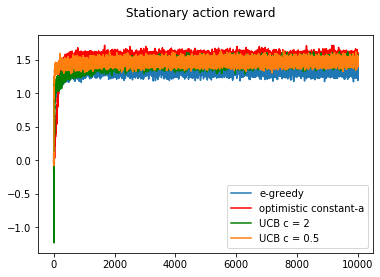

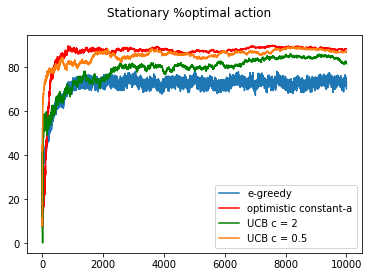

In [302]:
#UCB Stationary
times = 500
turns = 10000
alpha = 0.1

step_propogation = [multi_bandit(10, 0.1,[], True) for i in range(times)]
qs = [5 for i in range(10)]
optimistic = [multi_bandit(10, 0,qs.copy(), True) for i in range(times)]
ucb = [multi_bandit(10, 0,[], True) for i in range(times)]
ucb2 = [multi_bandit(10, 0,[], True) for i in range(times)]

for i in range(times):
    step_propogation[i].simulate_alpha(turns, alpha, True, False)
    optimistic[i].simulate_alpha(turns, alpha, True, False)
    ucb[i].simulate_alpha(turns, alpha, True, 2)
    ucb2[i].simulate_alpha(turns, alpha, True, 0.5)

optimal_action1 = [0 for i in range(turns)]
optimal_action2 = [0 for i in range(turns)]
optimal_action3 = [0 for i in range(turns)]
optimal_action4 = [0 for i in range(turns)]

action_reward1 = [0 for i in range(turns)]
action_reward2 = [0 for i in range(turns)]
action_reward3 = [0 for i in range(turns)]
action_reward4 = [0 for i in range(turns)]

for i in range(turns):
    for j in range(times):
        optimal_action1[i] += step_propogation[j].correct[i]
        optimal_action2[i] += optimistic[j].correct[i]
        optimal_action3[i] += ucb[j].correct[i]
        optimal_action4[i] += ucb2[j].correct[i]


        action_reward1[i] += step_propogation[j].rewards[i]
        action_reward2[i] += optimistic[j].rewards[i]
        action_reward3[i] += ucb[j].rewards[i]
        action_reward4[i] += ucb2[j].rewards[i]


    optimal_action1[i]*=100
    optimal_action2[i]*=100
    optimal_action3[i]*=100
    optimal_action4[i]*=100

    
    optimal_action1[i]/=times
    optimal_action2[i]/=times
    optimal_action3[i]/=times
    optimal_action4[i]/=times

    action_reward1[i]/=times
    action_reward2[i]/=times
    action_reward3[i]/=times
    action_reward4[i]/=times
    
plt.plot(action_reward1, label = "e-greedy")
plt.plot(action_reward2, 'r', label = "optimistic constant-a")
plt.plot(action_reward3, 'g', label = "UCB c = 2")
plt.plot(action_reward4, label = "UCB c = 0.5")
plt.legend(loc = 'lower right')
plt.suptitle("Stationary action reward")
plt.show()


plt.plot(optimal_action1, label = "e-greedy")
plt.plot(optimal_action2, 'r', label = "optimistic constant-a")
plt.plot(optimal_action3, 'g',  label = "UCB c = 2")
plt.plot(optimal_action4, label = "UCB c = 0.5")
plt.legend(loc = 'lower right')
plt.suptitle("Stationary %optimal action")
plt.show()

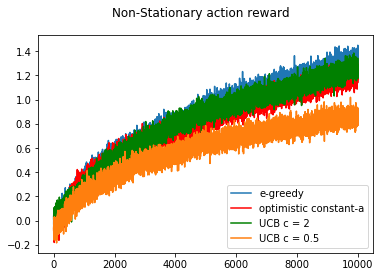

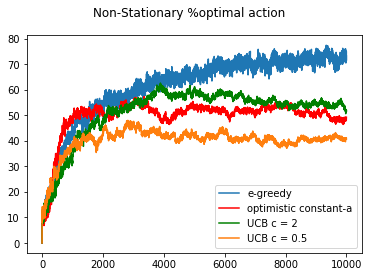

In [303]:
#UCB Non-Stationary
times = 500
turns = 10000
alpha = 0.1

step_propogation = [multi_bandit(10, 0.1,[], False) for i in range(times)]
qs = [5 for i in range(10)]
optimistic = [multi_bandit(10, 0,qs.copy(), False) for i in range(times)]
ucb = [multi_bandit(10, 0,[], False) for i in range(times)]
ucb2 = [multi_bandit(10, 0,[], False) for i in range(times)]

for i in range(times):
    step_propogation[i].simulate_alpha(turns, alpha, False, False)
    optimistic[i].simulate_alpha(turns, alpha, False, False)
    ucb[i].simulate_alpha(turns, alpha, False, 2)
    ucb2[i].simulate_alpha(turns, alpha, False, 0.5)

optimal_action1 = [0 for i in range(turns)]
optimal_action2 = [0 for i in range(turns)]
optimal_action3 = [0 for i in range(turns)]
optimal_action4 = [0 for i in range(turns)]

action_reward1 = [0 for i in range(turns)]
action_reward2 = [0 for i in range(turns)]
action_reward3 = [0 for i in range(turns)]
action_reward4 = [0 for i in range(turns)]

for i in range(turns):
    for j in range(times):
        optimal_action1[i] += step_propogation[j].correct[i]
        optimal_action2[i] += optimistic[j].correct[i]
        optimal_action3[i] += ucb[j].correct[i]
        optimal_action4[i] += ucb2[j].correct[i]


        action_reward1[i] += step_propogation[j].rewards[i]
        action_reward2[i] += optimistic[j].rewards[i]
        action_reward3[i] += ucb[j].rewards[i]
        action_reward4[i] += ucb2[j].rewards[i]


    optimal_action1[i]*=100
    optimal_action2[i]*=100
    optimal_action3[i]*=100
    optimal_action4[i]*=100

    
    optimal_action1[i]/=times
    optimal_action2[i]/=times
    optimal_action3[i]/=times
    optimal_action4[i]/=times

    action_reward1[i]/=times
    action_reward2[i]/=times
    action_reward3[i]/=times
    action_reward4[i]/=times
    
plt.plot(action_reward1, label = "e-greedy")
plt.plot(action_reward2, 'r', label = "optimistic constant-a")
plt.plot(action_reward3, 'g', label = "UCB c = 2")
plt.plot(action_reward4, label = "UCB c = 0.5")
plt.legend(loc = 'lower right')
plt.suptitle("Non-Stationary action reward")
plt.show()


plt.plot(optimal_action1, label = "e-greedy")
plt.plot(optimal_action2, 'r', label = "optimistic constant-a")
plt.plot(optimal_action3, 'g',  label = "UCB c = 2")
plt.plot(optimal_action4, label = "UCB c = 0.5")
plt.legend(loc = 'lower right')
plt.suptitle("Non-Stationary %optimal action")

plt.show()